In [2]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By

In [3]:
# driver를 이용해 해당 사이트에 요청 보내기

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get("https://www.weather.go.kr/w/weather/forecast/short-term.do")
driver.implicitly_wait(1)

temps = driver.find_element(By.ID, "my-tchart").text
temps = [int(i) for i in temps.replace("℃","").split("\n")] # ℃ 생략시킴 + 정수 타입
print(temps)


[31, 31, 29, 29, 29, 29, 29, 28, 27, 27, 26, 26, 26, 25, 25, 25, 25, 24, 25]


<AxesSubplot:>

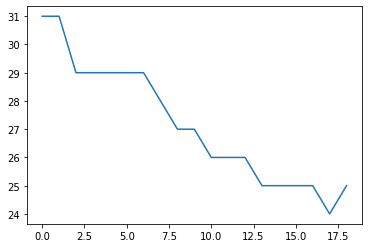

In [4]:
# 받아온 데이터를 통해 꺾은선 그래프를 그려보자. 
import seaborn as sns
sns.lineplot(
    x = [i for i in range(len(temps))],
    y = temps
)

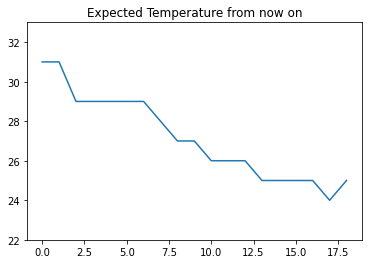

In [5]:
# 받아온 데이터의 ylim을 조금 더 길게 잡아보자
import matplotlib.pyplot as plt

plt.ylim(min(temps)-2, max(temps)+2)
plt.title("Expected Temperature from now on")
sns.lineplot(
    x = [i for i in range(len(temps))],
    y = temps
)
plt.show()